In [8]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [6]:
df = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = df.load_data()

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train.shape[1:]

(28, 28)

In [22]:
RNN_model = Sequential()

RNN_model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='relu',return_sequences=True))
RNN_model.add(Dropout(0.2))

RNN_model.add(LSTM(128, activation='relu'))
RNN_model.add(Dropout(0.2))

RNN_model.add(Dense(32, activation='relu'))
RNN_model.add(Dropout(0.2))

RNN_model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3)

RNN_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

history = RNN_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/home/anson/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/anson/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6081 - loss: 1.1472 - val_accuracy: 0.9470 - val_loss: 0.1714
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9479 - loss: 0.1874 - val_accuracy: 0.9705 - val_loss: 0.1075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9653 - loss: 0.1289 - val_accuracy: 0.9710 - val_loss: 0.0939
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9743 - loss: 0.0992 - val_accuracy: 0.9824 - val_loss: 0.0612
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9797 - loss: 0.0781 - val_accuracy: 0.9770 - val_loss: 0.0756
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9821 - loss: 0.0654 - val_accuracy: 0.9855 - val_loss: 0.0482
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9845 - loss: 0.0560 - val_accuracy: 0.9810 - val_loss: 0.0654
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9859 - loss: 0

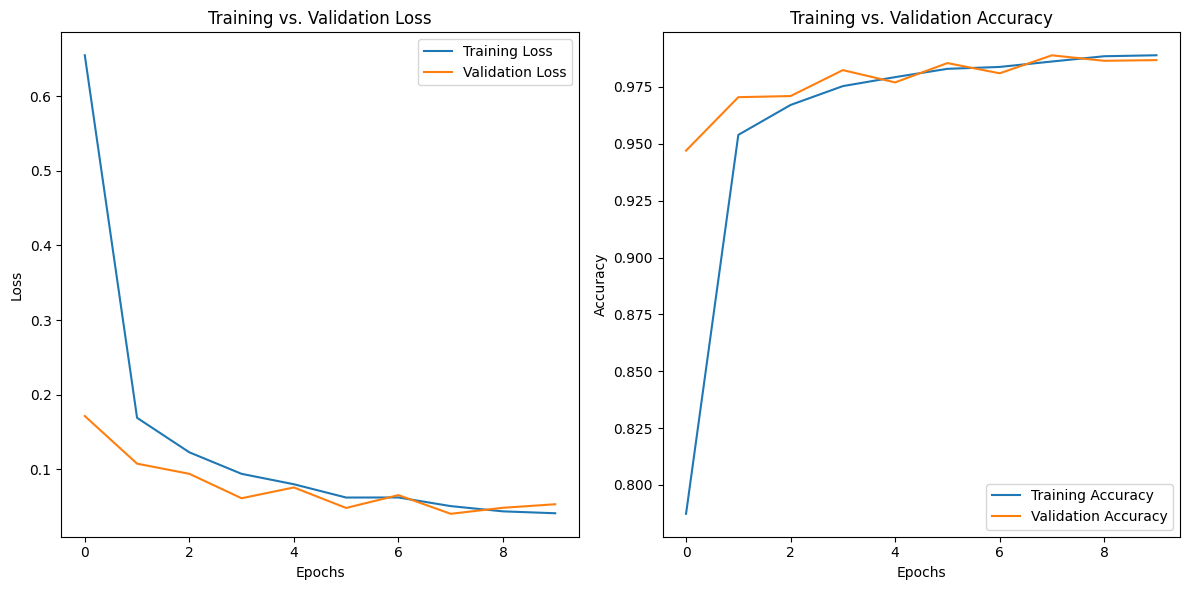

In [27]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
test_loss, test_accuracy = RNN_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9858 - loss: 0.0588
Test Loss: 0.05311242491006851
Test Accuracy: 0.9868000149726868
